# **ASSIGNMENT : IRIS MULTI-CLASS CLASSIFICATION**

###### **Purpose :**
To predict the species of flower .
###### **Description :**
The dataset contains a set of 150 records under 5 attributes - Petal Length, Petal Width, Sepal Length, Sepal width and Class(Species).
###### **Requirements :**
1) Code must be in tf 2.0 .

2) Accuracy must be in between 95-97% .

3) Model shouldn't be Overfit (You can add drop out layer for this) .

### **STEP 1 : Load all the necessary libraries**

In [1]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt

### **STEP 2 : Data Preparation**
This step consists of multiple sub steps from data loading [download](https://github.com/ramsha275/PIAIC-Sir-Anees-Quarter-2/blob/master/Deep%20Learning/iris.csv),shuffling ,spliting in **Train** and **Test** sets to one-hot-enconding on labels . 


In [2]:
iris_df = pd.read_csv('iris.csv')
display(iris_df.head())
print("Size:", iris_df.size)
print("Shape:", iris_df.shape)
print("Dimension:", iris_df.ndim)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


Size: 750
Shape: (150, 5)
Dimension: 2


In [3]:
# The frac keyword argument specifies the fraction of rows to return in the random sample,
# so frac=1 means return all rows (in random order).
shuffled_iris_df = iris_df.sample(frac=1)
shuffled_iris_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
123,6.3,2.7,4.9,1.8,Virginica
1,4.9,3.0,1.4,0.2,Setosa
14,5.8,4.0,1.2,0.2,Setosa
73,6.1,2.8,4.7,1.2,Versicolor
22,4.6,3.6,1.0,0.2,Setosa


In [5]:
# If you wish to shuffle your dataframe in-place and reset the index
shuffled_iris_df = iris_df.sample(frac=1).reset_index(drop=True)
# Here, specifying drop=True prevents .reset_index from creating a column containing the old index entries.
shuffled_iris_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,6.1,2.9,4.7,1.4,Versicolor
1,5.0,3.3,1.4,0.2,Setosa
2,4.5,2.3,1.3,0.3,Setosa
3,4.9,2.5,4.5,1.7,Virginica
4,7.7,2.6,6.9,2.3,Virginica


In [6]:
dataset = shuffled_iris_df.values
print(dataset.shape)
dataset_input = dataset[:, :4].astype(float)
dataset_output = dataset[:, 4]
print(dataset_input.shape)
print(dataset_output.shape)

(150, 5)
(150, 4)
(150,)


In [7]:
x_train = dataset_input[:90] # 60 % Training Data
y_train = dataset_output[:90] # 60 % Training Data

val_x = dataset_input[90:120] # 20 % Validation Data
val_y = dataset_output[90:120] # 20 % Validation Data

x_test = dataset_input[120:] # 20 % Test Data
y_test = dataset_output[120:] # 20 % Test Data

In [8]:
x_train.shape , y_train.shape , x_test.shape , y_test.shape , val_x.shape , val_y.shape

((90, 4), (90,), (30, 4), (30,), (30, 4), (30,))

In [9]:
encoder = LabelEncoder()

# encode class values as integers
encoded_y_train = encoder.fit_transform(y_train)
# convert integers to dummy variables (i.e. one hot encoded)
encoded_y_train = to_categorical(encoded_y_train)

# encode class values as integers
encoded_val_y = encoder.fit_transform(val_y)
# convert integers to dummy variables (i.e. one hot encoded)
encoded_val_y = tf.keras.utils.to_categorical(encoded_val_y)

# encode class values as integers
encoded_y_test = encoder.fit_transform(y_test)
# convert integers to dummy variables (i.e. one hot encoded)
encoded_y_test = tf.keras.utils.to_categorical(encoded_y_test)

print(encoded_y_train[0])
print(encoded_y_train.shape)

[0. 1. 0.]
(90, 3)


### **STEP 3 : Model Architecture**


###### Input : 4 
###### 1 hidden Layer : 8 nodes
###### Output : 3

In [10]:
network = models.Sequential()
network.add(layers.Dense(8, activation='relu', input_shape=(4,)))
network.add(layers.Dense(3, activation='softmax'))

### **STEP 4 : Compilation Step**

In [11]:
network.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = network.fit(x_train, encoded_y_train, validation_data=(val_x, encoded_val_y), epochs=200)

Train on 90 samples, validate on 30 samples
Epoch 1/200
90/90 [==============================] - 6s 65ms/sample - loss: 1.9787 - accuracy: 0.6111 - val_loss: 2.2858 - val_accuracy: 0.5000
Epoch 2/200
90/90 [==============================] - 0s 1ms/sample - loss: 1.9223 - accuracy: 0.5444 - val_loss: 2.2218 - val_accuracy: 0.4333
Epoch 3/200
90/90 [==============================] - 0s 1ms/sample - loss: 1.8671 - accuracy: 0.4556 - val_loss: 2.1618 - val_accuracy: 0.4000
Epoch 4/200
90/90 [==============================] - 0s 1ms/sample - loss: 1.8167 - accuracy: 0.4000 - val_loss: 2.1044 - val_accuracy: 0.4000
Epoch 5/200
90/90 [==============================] - 0s 1ms/sample - loss: 1.7677 - accuracy: 0.4000 - val_loss: 2.0488 - val_accuracy: 0.4000
Epoch 6/200
90/90 [==============================] - 0s 1ms/sample - loss: 1.7222 - accuracy: 0.4000 - val_loss: 1.9955 - val_accuracy: 0.4000
Epoch 7/200
90/90 [==============================] - 0s 1ms/sample - loss: 1.6790 - accuracy: 0.4

90/90 [==============================] - 0s 1ms/sample - loss: 0.7352 - accuracy: 0.8111 - val_loss: 0.7731 - val_accuracy: 0.6667
Epoch 58/200
90/90 [==============================] - 0s 900us/sample - loss: 0.7297 - accuracy: 0.8111 - val_loss: 0.7669 - val_accuracy: 0.7000
Epoch 59/200
90/90 [==============================] - 0s 844us/sample - loss: 0.7237 - accuracy: 0.8111 - val_loss: 0.7612 - val_accuracy: 0.7000
Epoch 60/200
90/90 [==============================] - 0s 867us/sample - loss: 0.7183 - accuracy: 0.8111 - val_loss: 0.7557 - val_accuracy: 0.7000
Epoch 61/200
90/90 [==============================] - 0s 933us/sample - loss: 0.7126 - accuracy: 0.8111 - val_loss: 0.7500 - val_accuracy: 0.7000
Epoch 62/200
90/90 [==============================] - 0s 889us/sample - loss: 0.7070 - accuracy: 0.8111 - val_loss: 0.7443 - val_accuracy: 0.7333
Epoch 63/200
90/90 [==============================] - 0s 1ms/sample - loss: 0.7019 - accuracy: 0.8111 - val_loss: 0.7388 - val_accuracy: 0.

90/90 [==============================] - 0s 711us/sample - loss: 0.5163 - accuracy: 0.9000 - val_loss: 0.5400 - val_accuracy: 0.9000
Epoch 114/200
90/90 [==============================] - 0s 767us/sample - loss: 0.5138 - accuracy: 0.9000 - val_loss: 0.5371 - val_accuracy: 0.9000
Epoch 115/200
90/90 [==============================] - 0s 1ms/sample - loss: 0.5114 - accuracy: 0.9000 - val_loss: 0.5344 - val_accuracy: 0.9000
Epoch 116/200
90/90 [==============================] - 0s 1ms/sample - loss: 0.5091 - accuracy: 0.9000 - val_loss: 0.5315 - val_accuracy: 0.9000
Epoch 117/200
90/90 [==============================] - 0s 633us/sample - loss: 0.5066 - accuracy: 0.9000 - val_loss: 0.5290 - val_accuracy: 0.9000
Epoch 118/200
90/90 [==============================] - 0s 656us/sample - loss: 0.5043 - accuracy: 0.9000 - val_loss: 0.5267 - val_accuracy: 0.9000
Epoch 119/200
90/90 [==============================] - 0s 600us/sample - loss: 0.5022 - accuracy: 0.9000 - val_loss: 0.5244 - val_accura

90/90 [==============================] - 0s 578us/sample - loss: 0.4155 - accuracy: 0.9111 - val_loss: 0.4205 - val_accuracy: 0.9333
Epoch 170/200
90/90 [==============================] - 0s 656us/sample - loss: 0.4141 - accuracy: 0.9111 - val_loss: 0.4189 - val_accuracy: 0.9333
Epoch 171/200
90/90 [==============================] - 0s 589us/sample - loss: 0.4129 - accuracy: 0.9111 - val_loss: 0.4177 - val_accuracy: 0.9333
Epoch 172/200
90/90 [==============================] - 0s 533us/sample - loss: 0.4115 - accuracy: 0.9111 - val_loss: 0.4164 - val_accuracy: 0.9333
Epoch 173/200
90/90 [==============================] - 0s 556us/sample - loss: 0.4101 - accuracy: 0.9111 - val_loss: 0.4148 - val_accuracy: 0.9333
Epoch 174/200
90/90 [==============================] - 0s 611us/sample - loss: 0.4090 - accuracy: 0.9111 - val_loss: 0.4127 - val_accuracy: 0.9333
Epoch 175/200
90/90 [==============================] - 0s 578us/sample - loss: 0.4076 - accuracy: 0.9111 - val_loss: 0.4114 - val_ac

### **STEP 5 : Evaluation**

In [12]:
results = network.evaluate(x_test, encoded_y_test)
results

30/1 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 267us/sample - loss: 0.2799 - accuracy: 0.9333


[0.2799120545387268, 0.93333334]

In [13]:
history_dic = history.history
history_dic.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

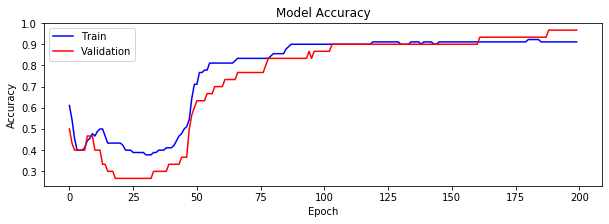

In [14]:
plt.figure(figsize=(10,3))
plt.plot(history.history['accuracy'] , "b-")
plt.plot(history.history['val_accuracy'], "r")
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### **STEP 6 : Prediction**

In [15]:
i = 5
prediction =  network.predict_classes(x_test[i].reshape(1,4))
prediction

array([2], dtype=int64)

In [16]:
if prediction == 0:
    print("The data is :", x_test[i], "and I have predicted that it's a", prediction, "i.e Iris-setosa")
    print("Actual data :", x_test[i], "actual label :", y_test[i])
elif prediction == 1:
    print("The data is :", x_test[i], "and I have predicted that it's a", prediction, "i.e Iris-versicolor")
    print("Actual data :", x_test[i], "actual label :", y_test[i])

else:
    print("The data is :", x_test[i], "and I have predicted that it's a", prediction, "i.e Iris-virginica")
    print("Actual data :", x_test[i], "actual label :", y_test[i])

The data is : [6.  2.2 4.  1. ] and I have predicted that it's a [2] i.e Iris-virginica
Actual data : [6.  2.2 4.  1. ] actual label : Versicolor


# **STEP 7 : Training New Model**

In [17]:
network2 = models.Sequential()
network2.add(layers.Dense(10, activation='relu', input_shape=(4,)))
network2.add(layers.Dense(8, activation='relu'))
network2.add(layers.Dense(3, activation='softmax'))

network2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = network2.fit(x_train, encoded_y_train, validation_data=(val_x, encoded_val_y), epochs=50)

Train on 90 samples, validate on 30 samples
Epoch 1/50
90/90 [==============================] - 2s 25ms/sample - loss: 1.5837 - accuracy: 0.3667 - val_loss: 1.6747 - val_accuracy: 0.2667
Epoch 2/50
90/90 [==============================] - 0s 1ms/sample - loss: 1.4949 - accuracy: 0.3667 - val_loss: 1.5835 - val_accuracy: 0.2667
Epoch 3/50
90/90 [==============================] - 0s 1ms/sample - loss: 1.4217 - accuracy: 0.3667 - val_loss: 1.4999 - val_accuracy: 0.2667
Epoch 4/50
90/90 [==============================] - 0s 1ms/sample - loss: 1.3512 - accuracy: 0.3667 - val_loss: 1.4255 - val_accuracy: 0.2667
Epoch 5/50
90/90 [==============================] - 0s 1ms/sample - loss: 1.2895 - accuracy: 0.3667 - val_loss: 1.3606 - val_accuracy: 0.2667
Epoch 6/50
90/90 [==============================] - 0s 1ms/sample - loss: 1.2407 - accuracy: 0.3667 - val_loss: 1.3051 - val_accuracy: 0.2667
Epoch 7/50
90/90 [==============================] - 0s 1ms/sample - loss: 1.1967 - accuracy: 0.3667 - v

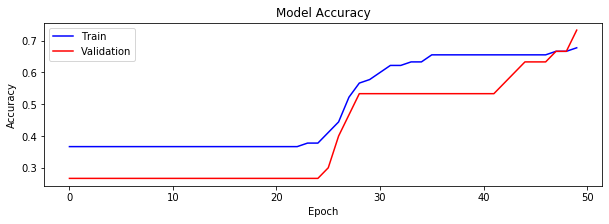

In [18]:
plt.figure(figsize=(10,3))
plt.plot(history.history['accuracy'] , "b-")
plt.plot(history.history['val_accuracy'], "r")
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()